In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup = pd.read_csv ('C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# checking for non null values and data type

In [4]:
startup.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# lets convert state data into dummy variables

In [6]:
startup1= pd.get_dummies(startup,columns=['State'])

In [7]:
startup1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Let's rename the col names for simplicity of usuage

In [8]:
startup2=startup1.rename(columns = {'R&D Spend':'RnD', 'Administration':'Admin','Marketing Spend':'MS',
                                    'State_California':'CA','State_Florida':'FL','State_New York':'NY'})

In [9]:
startup2.head()

,RnD,Admin,MS,Profit,CA,FL,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
# checking for duplicates
startup2[startup2.duplicated()].shape

(0, 7)

In [11]:
startup2.corr()

,RnD,Admin,MS,Profit,CA,FL,NY
RnD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
CA,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
FL,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


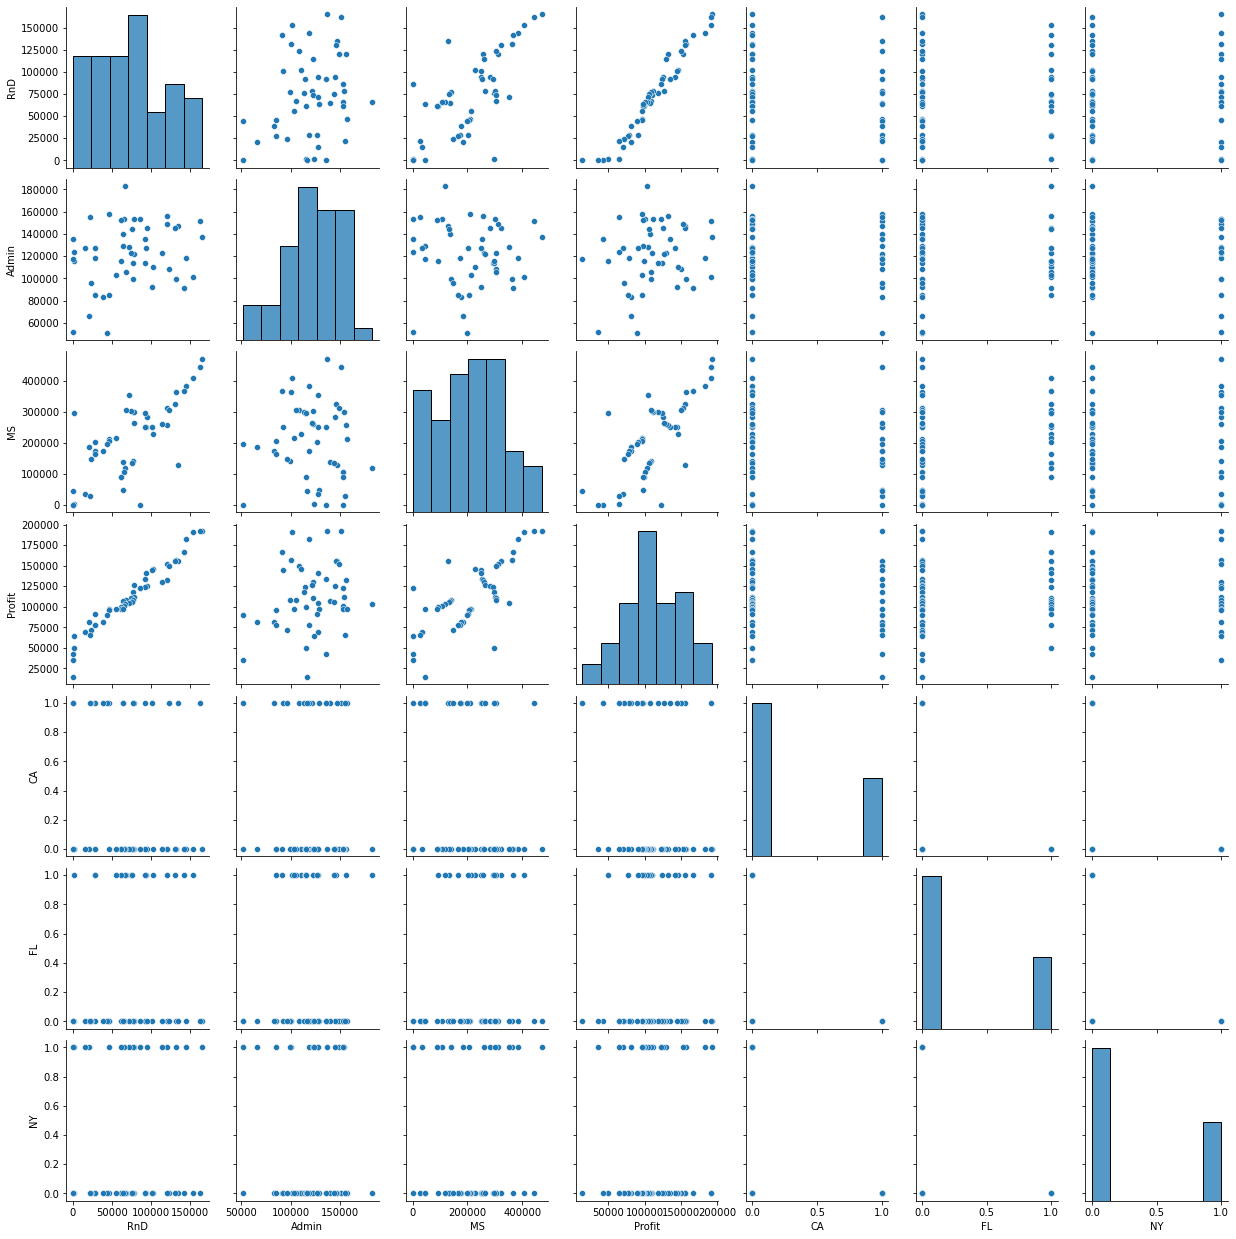

In [12]:
sns.pairplot (data=startup2)

# building the regression model

In [13]:
model1 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=startup2).fit()

In [14]:
model1.params

Intercept    37633.233317
RnD              0.806023
Admin           -0.027004
MS               0.026980
CA           12492.110514
FL           12690.899307
NY           12450.223495
dtype: float64

In [15]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.417409
RnD          17.368580
Admin        -0.517012
MS            1.573889
CA            5.099242
FL            4.654306
NY            5.007401
dtype: float64 
 Intercept    2.807645e-09
RnD          2.578772e-21
Admin        6.077373e-01
MS           1.226769e-01
CA           6.942555e-06
FL           2.992503e-05
NY           9.409010e-06
dtype: float64


In [16]:
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Calculating VIF to check colinearity factor

In [17]:
rsq_RnD = smf.ols('RnD~Admin+MS',data=startup2).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) 

rsq_Admin = smf.ols('Admin~RnD+MS',data=startup2).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin) 

rsq_MS = smf.ols('MS~RnD+Admin',data=startup2).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 


d1 = {'Variables':['RnD','Admin','MS'],'VIF':[vif_RnD,vif_Admin,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RnD,2.468903
1,Admin,1.175091
2,MS,2.326773


In [18]:
# All VIF values are less than 20, there are no colinear variables

In [19]:
# Q-Q plot for checking the normality of residuals

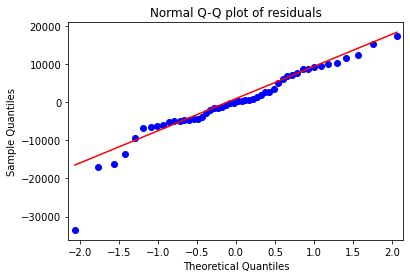

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

In [22]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

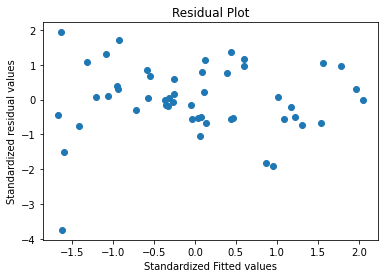

In [23]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [24]:
# Residual plot is not following any pattern, so its a good plot

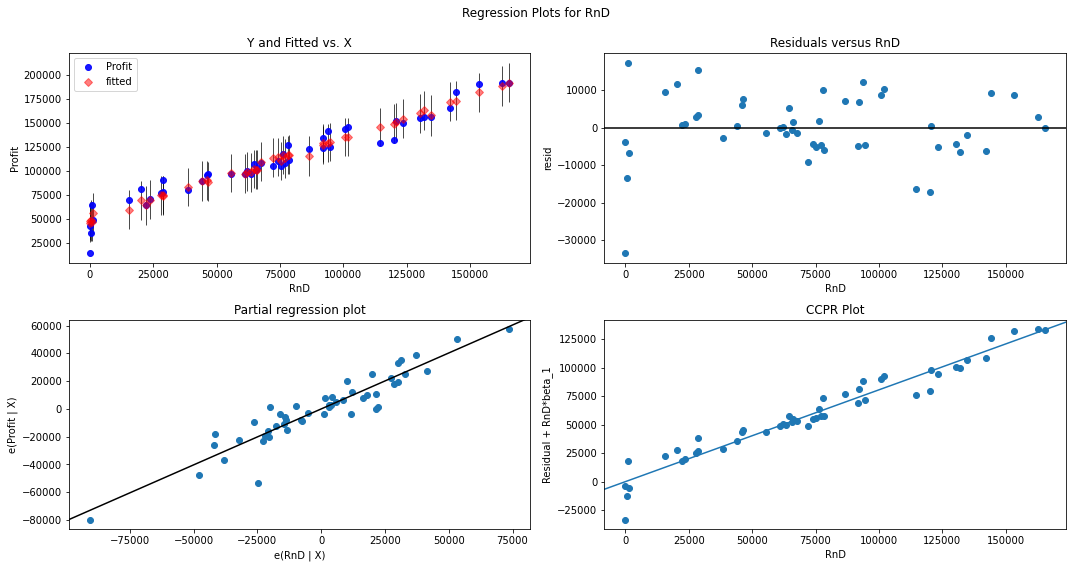

In [25]:
# Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RnD", fig=fig)
plt.show()

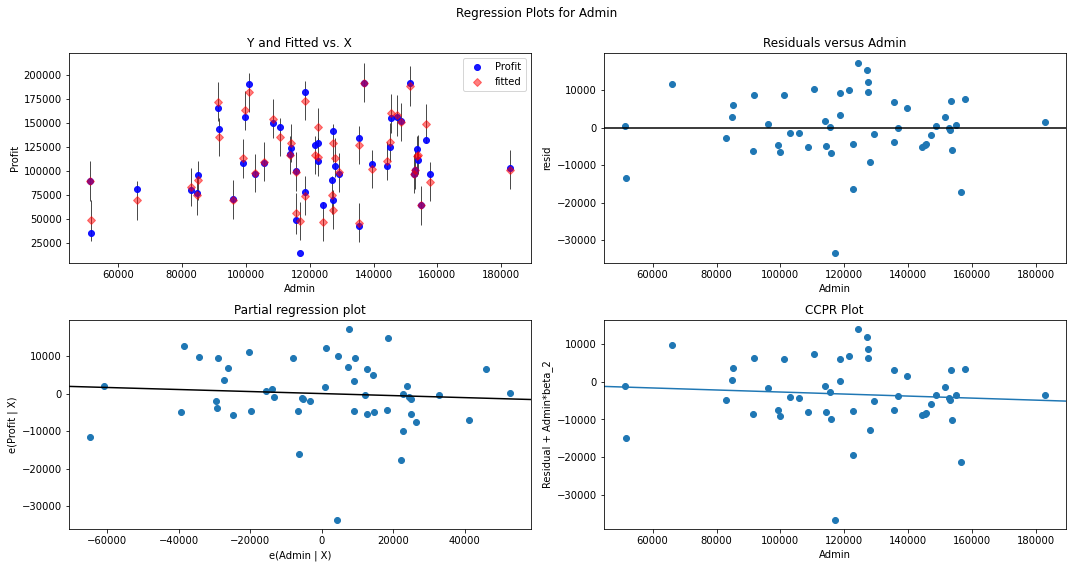

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Admin", fig=fig)
plt.show()

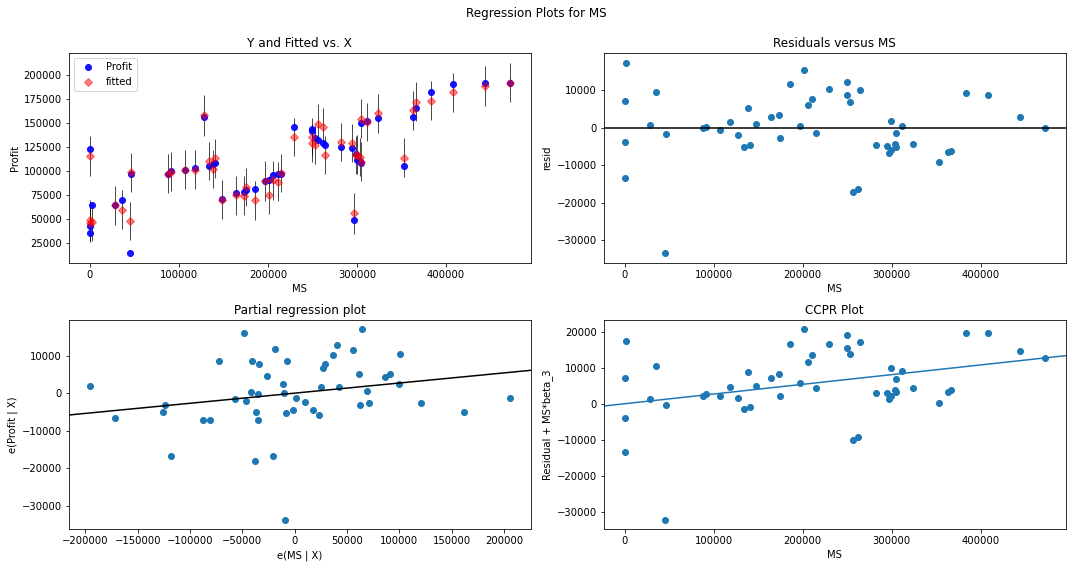

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "MS", fig=fig)
plt.show()

In [28]:
# Identifying the outliers to make the model better using cook's distance technique
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

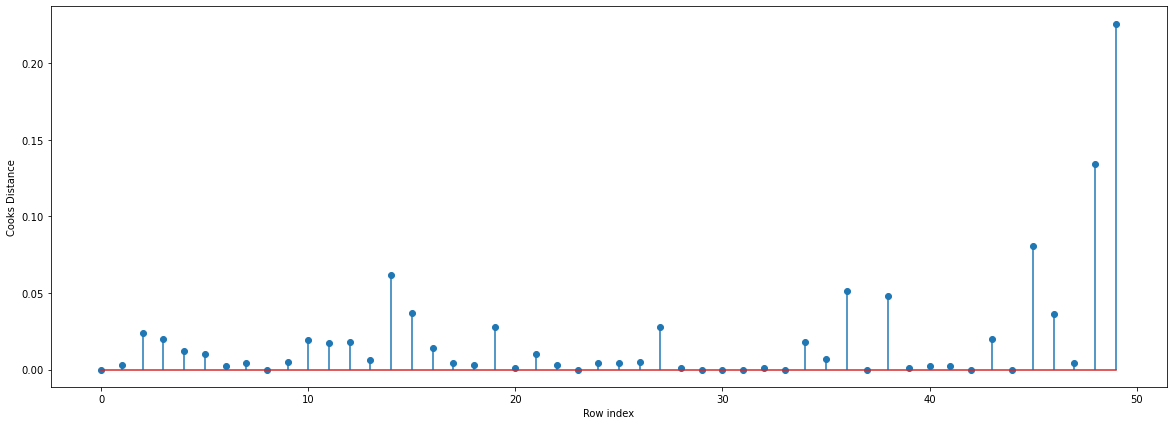

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

In [31]:
startup2[startup2.index.isin([49])]

,RnD,Admin,MS,Profit,CA,FL,NY
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [32]:
startup3=startup2.drop(startup2.index[[49]],axis=0).reset_index()

In [33]:
startup3 = startup3.drop(['index'],axis=1)

In [34]:
model2 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=startup3).fit()

In [35]:
(model2.rsquared,model2.rsquared_adj)

(0.9618082858227786, 0.9573673888254273)

In [36]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

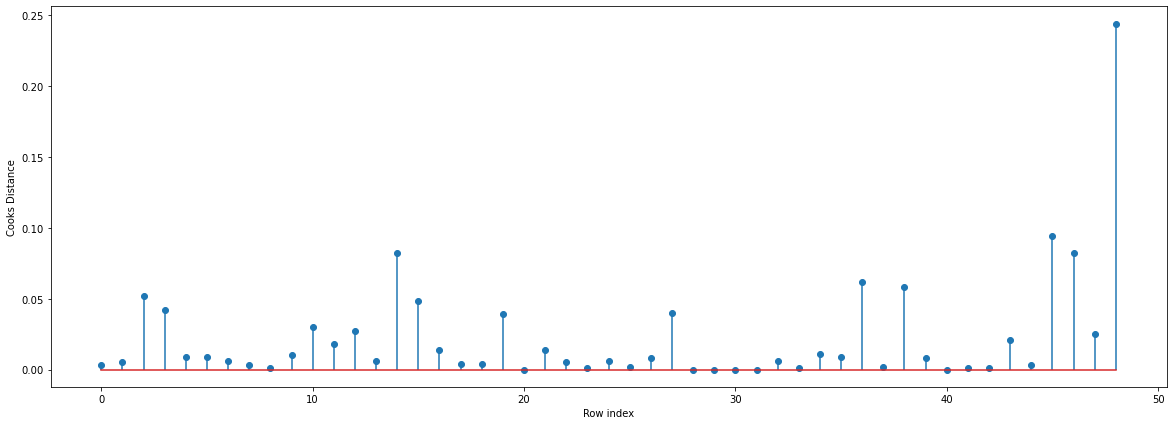

In [37]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(48, 0.24352817571403917)

In [39]:
startup3[startup3.index.isin([48])]

,RnD,Admin,MS,Profit,CA,FL,NY
48,542.05,51743.15,0.0,35673.41,0,0,1


In [40]:
startup4=startup3.drop(startup3.index[[48]],axis=0).reset_index()

In [41]:
startup4 = startup4.drop(['index'],axis=1)

In [42]:
model3 = smf.ols('Profit~RnD+Admin+MS+CA+FL+NY',data=startup4).fit()

In [43]:
(model3.rsquared,model3.rsquared_adj)

(0.9628371102993712, 0.9584129567635821)

In [44]:
# As there is only slight change in R value in model 3 from model 2, we will not delete any further data point and consider model 3 as the final model

In [45]:
# Checking the model by predicting the profit of the same data set and comparing it with actual values

In [46]:
pred_profit = pd.DataFrame (model3.predict(startup4), columns=['Predict_Profit'])

In [47]:
pred_profit.head()

,Predict_Profit
0,189087.074698
1,186183.370112
2,180288.581217
3,172087.545967
4,171206.768166


In [48]:
Actual_Profit = startup4['Profit']

In [49]:
pred_profit1 = pd.concat([Actual_Profit, pred_profit], axis=1)

In [50]:
pred_profit1.head()

,Profit,Predict_Profit
0,192261.83,189087.074698
1,191792.06,186183.370112
2,191050.39,180288.581217
3,182901.99,172087.545967
4,166187.94,171206.768166


In [51]:
Error = pd.DataFrame (((pred_profit1['Predict_Profit']- pred_profit1['Profit'])/pred_profit1['Profit']), columns=['Error'])

In [52]:
result = pd.concat ([pred_profit1, Error], axis=1)

In [53]:
result.head()

,Profit,Predict_Profit,Error
0,192261.83,189087.074698,-0.016513
1,191792.06,186183.370112,-0.029244
2,191050.39,180288.581217,-0.056330
3,182901.99,172087.545967,-0.059127
4,166187.94,171206.768166,0.030200


In [54]:
result.style.format({'Profit': "{:.2f}",'Predict_Profit': "{:.2f}",'Error': "{:.2%}"})

,Profit,Predict_Profit,Error
0,192261.83,189087.07,-1.65%
1,191792.06,186183.37,-2.92%
2,191050.39,180288.58,-5.63%
3,182901.99,172087.55,-5.91%
4,166187.94,171206.77,3.02%
5,156991.12,163039.18,3.85%
6,156122.51,158709.12,1.66%
7,155752.60,157770.47,1.30%
8,152211.77,150142.26,-1.36%
9,149759.96,155379.92,3.75%


In [55]:
result.Error.mean()

0.004337744560180249

In [56]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecating is working well.